<a href="https://colab.research.google.com/github/mintesin/Projects/blob/main/CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT**
1. This project is multiclass clasisfication in which we use iris dataset to classify whether the flower is iris setosa,iris versicolor or iris verginica
2. Time speed is good but not it is not must.

**ABOUT THE DATASET**

1. The data set is known as iris data set.
2. It contains sepal length,sepal width, petal length and petal width


In [ ]:

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names=['sepal_length','sepal_width','petal-length','petal_width','class']
data=pd.read_csv(url,names=names)

In [ ]:
data.shape

(150, 5)

In [ ]:
#Let us see what kind of features we have,basically four features we have
data.columns

Index(['sepal_length', 'sepal_width', 'petal-length', 'petal_width', 'class'], dtype='object')

In [ ]:
data.head()

,sepal_length,sepal_width,petal-length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail(7)

,sepal_length,sepal_width,petal-length,petal_width,class
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:

data.describe()

,sepal_length,sepal_width,petal-length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The interquartile range for our features is uniform interms of it change and range(but it doesn't mean they are equal).

In [ ]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
array=data.values

In [ ]:
x=array[:,0:3]
y=array[:,3]

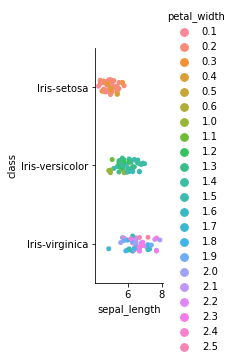

In [ ]:
#Let us see our category float interm of petal length
sns.catplot(x='sepal_length', y='class',
                hue="petal_width", 
                data=data, kind="strip",
                height=4, aspect=.7);

We can see that we can comforatbly distinguish iris setosa andf iris versicolor.But in case iris verginica it can be noticed there is an ovelapping 

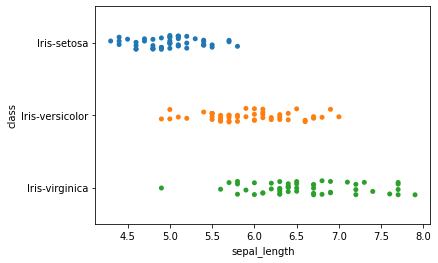

In [ ]:
sns.stripplot(x="sepal_length", y="class", data=data)

Strip plot has done better in distinguishing. all the three classes 

#

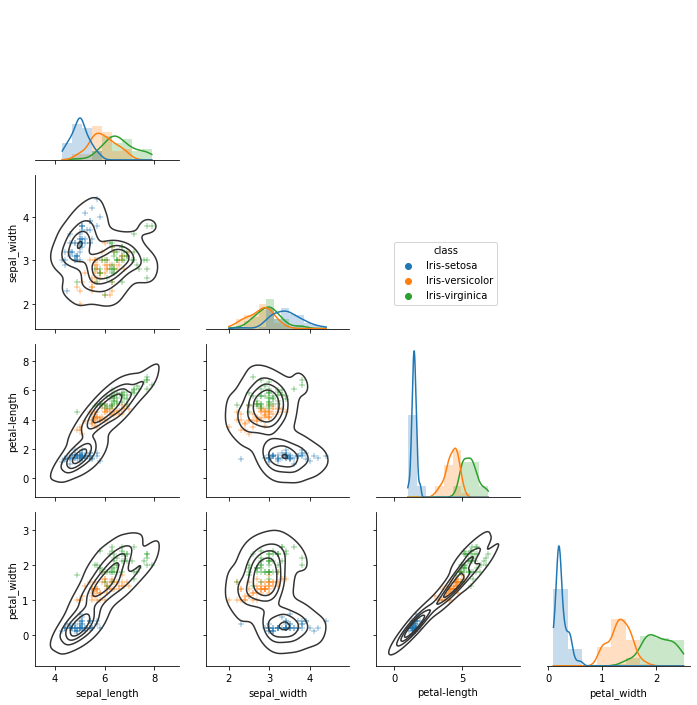

In [ ]:
plot=sns.PairGrid(data,hue='class',corner=True)
plot.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
plot.map_lower(sns.scatterplot, marker="+")
plot.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
plot.add_legend(frameon=True)
plot.legend.set_bbox_to_anchor((.61, .6))

In [ ]:
pca=PCA(n_components=2)
fit=pca.fit(x)
print(fit.explained_variance_ratio_)
print(fit.components_)

[0.92466345 0.0604435 ]
[[ 0.39015139 -0.0886552   0.91647267]
 [ 0.63920348  0.74249784 -0.20028948]]


<Figure size 720x720 with 0 Axes>

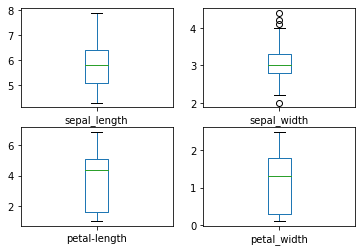

In [ ]:
plt.figure(figsize=(10,10))
data.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

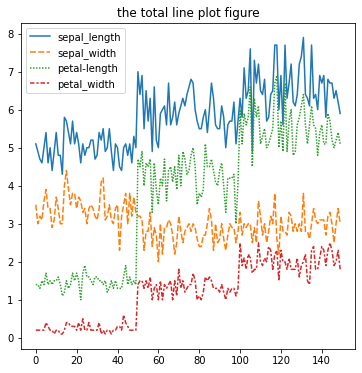

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,6))
plt.title("the total line plot figure")
sns.lineplot(data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


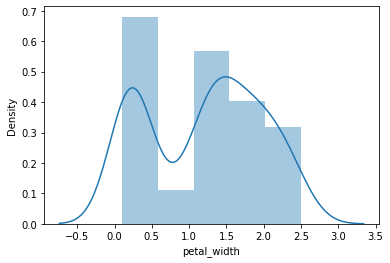

In [ ]:
sns.distplot(data['petal_width'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7101c8d90>,
      dtype=object)

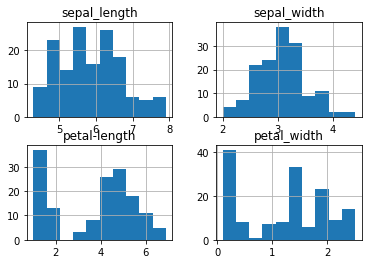

In [ ]:
data.hist()

<Figure size 864x432 with 0 Axes>

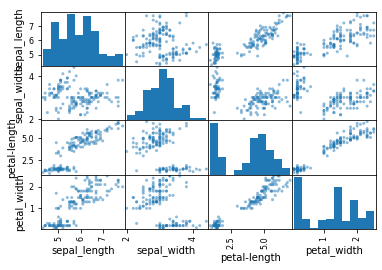

In [ ]:

plt.figure(figsize=(12,6))
scatter_matrix(data)
plt.show()

**NEXT**
1. Separation of the validation datset
2. Doing 10_fold cross validation
3. Building the models the and compare them
4. compare model


In [ ]:
array=data.values
x=array[:,0:4]
y=array[:,4]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

**BUILD MODEL**

In [ ]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LD',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [ ]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='ovr', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LD',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('SVM',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinkin

In [ ]:
results=[]
names=[]
for name,model in models:
  kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
  cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s:%f(%f)'%(name,cv_results.mean(),cv_results.std()))

LR:0.941667(0.065085)
LD:0.975000(0.038188)
KNN:0.958333(0.041667)
NB:0.950000(0.055277)
SVM:0.983333(0.033333)


{'boxes': [<matplotlib.lines.Line2D at 0x7fe7086eb650>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe7086a7d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe708213810>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe708213f90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe7086a1950>,
  <matplotlib.lines.Line2D at 0x7fe7080e6450>]}

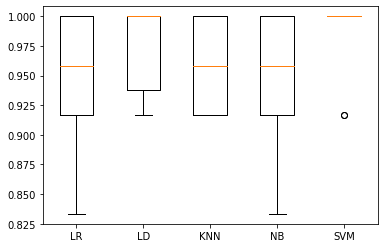

In [ ]:
plt.boxplot(results,labels=names)

At this point we have got
1. Best model which is SVM
2. Let us make pridictions without using the test data incase there is overfit or dataleak

In [ ]:

model=SVC(gamma='auto')
model.fit(x_train,y_train)
predictions=model.predict(x_test)

In [ ]:

predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



**CONCLUSION**

#1. Svm is the best model we have got
#2. Using svm model we have achieved:
 #a. RECALL(iris_setosa) is 100% which means all actual iris setosa  are classsified correctly
 #b. Precision(iris setosa) is 100% which means all flowers classified as iris setosa are actually iris setosas
 #c. Recall(iris_versicolor) is 92% which means 92% of  actual  iris versicolor are classified correctly
 #d. Precision(iris_versicolor) is 100 which means all flowers classified as iris setosa are actually iris versicolors
 #e.Recall(iris_virginica) is 86% meaning 86% percent of actual iris verginica are classified correctly
 #f.  Precision(iris virginica) is 100% which means all flowers classified as iris virginica are actually iris virginica.